# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.1 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [1]:
## ADD YOUR CODE HERE
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


np.random.seed(42)

X, Y = make_moons(1000, noise=0.4, random_state=0)
pol_transform = sklearn.preprocessing.PolynomialFeatures(degree=10)
X_pol = pol_transform.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_pol, Y, test_size=0.20, random_state=42)

2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



In [2]:
## ADD YOUR CODE HERE
from sklearn.manifold.t_sne import TSNE
from sklearn.neighbors.classification import KNeighborsClassifier
def plot_decision_boundary(model,X,y):
    Y_pred=model.predict(X)
    X_Train_embedded = TSNE(n_components=2).fit_transform(X)
    # create meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
    X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, Y_pred) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
    plt.show()

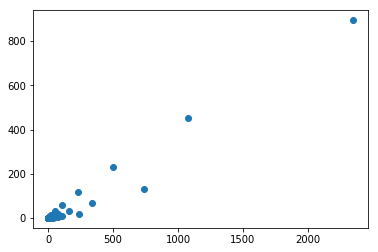

In [3]:
## ADD YOUR CODE HERE
plt.scatter(X_pol[0,:], X_pol[1,:])
plt.show()
# print(X_pol[: 2, :])

3) Use a Decision Tree to classify the data (5 points)



In [4]:
## ADD YOUR CODE HERE
from sklearn import tree

clf_gini = tree.DecisionTreeClassifier(random_state=0)
clf_gini = clf_gini.fit(x_train, y_train)
y_gini = clf_gini.predict(x_test)

4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

In [5]:
## ADD YOUR CODE HERE
# Gini
score_gini = clf_gini.score(X=x_test, y=y_test)
# Information Gain
clf_en = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
clf_en = clf_en.fit(x_train, y_train)
score_en = clf_en.score(X=x_test, y=y_test)

print('score of gini is {}'.format(score_gini))
print('score of Information Gain is {}'.format(score_en))

score of gini is 0.74
score of Information Gain is 0.735


5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



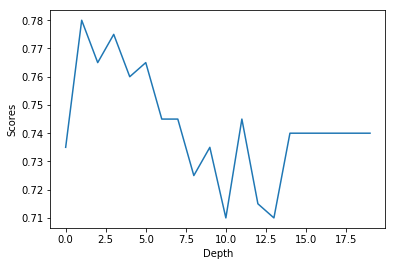

In [6]:
## ADD YOUR CODE HERE
score = [0] * 20
for d in range(20):
  clf = tree.DecisionTreeClassifier(random_state=0, max_depth = d + 1)
  clf. fit(x_train, y_train)
  score[d] = clf.score(X=x_test, y=y_test)
  
plt.plot(score)
plt.ylabel('Scores')
plt.xlabel('Depth')
plt.show()

6) How does the depth of a tree affect performance and computational burden? (1 points)



In [7]:
## ADD YOUR CODE HERE
# Deeper the tree, more computational expensive the tree. And if the tree depth is too deep, it will also causes overfitting

7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



In [9]:
## ADD YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
base = tree.DecisionTreeClassifier(random_state=0, max_depth = 1)
bagging = BaggingClassifier(
    base,
    n_estimators=10,
    max_samples=400, 
    bootstrap=True, 
    random_state=0)
bagging.fit(x_train, y_train)
bagging_acc = (y_test==bagging.predict(x_test)).mean()
print(bagging_acc)

# TODO plot versus what? too many features

0.725


8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 

a. Use the whole dataset to train the model is expensive.

b. Yes, I used(because bootstrap=True)

9)  Use a Decision Forest to classify the new dataset (4 points)



In [10]:
## ADD YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=10, 
                             max_depth=1,
                             bootstrap=True,
                             min_samples_split=400, 
                             random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean() 

0.7809999999999999

10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



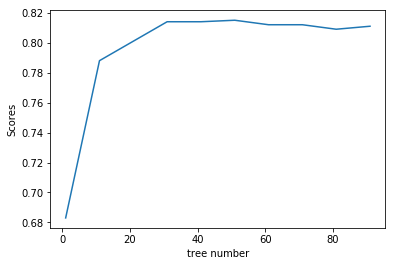

In [11]:
## ADD YOUR CODE HERE
i = 0
scores = [0] * 10
for n in range(1,100,10):
  clf = RandomForestClassifier(n_estimators=n, 
                               max_depth=1,
                               bootstrap=True,
                               min_samples_split=400, 
                               random_state=0)
  scores[i] = (cross_val_score(clf, X, Y, cv=5)).mean()
  i += 1

plt.plot(range(1,99,10), scores)
plt.ylabel('Scores')
plt.xlabel('tree number')
plt.show()

11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



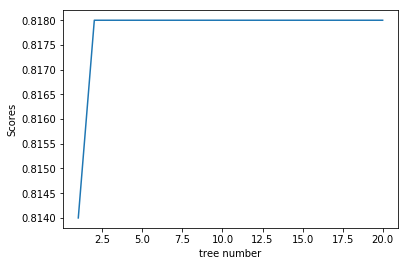

In [12]:
## ADD YOUR CODE HERE
i = 0
scores = [0] * 20
for d in range(1,21):
  clf = RandomForestClassifier(n_estimators=30, 
                               max_depth=d,
                               bootstrap=True,
                               min_samples_split=400, 
                               random_state=0)
  scores[i] = (cross_val_score(clf, X, Y, cv=5)).mean()
  i += 1

plt.plot(range(1,21), scores)
plt.ylabel('Scores')
plt.xlabel('tree number')
plt.show()

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

In [ ]:
## ADD YOUR CODE HERE

13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

In [ ]:
## ADD YOUR CODE HERE

## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [2]:
# load the data
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

data_dir = '/vol/lab/course/416/data/fashion/'

df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
y_train = df_train['label'].as_matrix().astype(np.uint8)
x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
y_test = df_test['label'].as_matrix().astype(np.uint8)

/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [3]:
def plot_images(data, n_samples_row=10):
    images = [image.reshape(28,28) for image in data]
    n_rows = (len(images) - 1) // n_samples_row + 1
    # append empty images if the last row is not complete
    empty_images = n_rows * n_samples_row - len(data)
    images.append(np.zeros((28, 28 * empty_images)))
    # draw row by row
    images_row = []
    for current_row in range(n_rows):
        tmp_row_images = images[current_row * n_samples_row : (current_row + 1) * n_samples_row]
        images_row.append(np.concatenate(tmp_row_images, axis=1))
    # draw all in one image
    image = np.concatenate(images_row, axis=0)
    plt.figure(figsize=(n_samples_row,n_rows))
    plt.imshow(image, cmap = matplotlib.cm.gray)
    plt.colorbar()

def sample_data(data, labels, labels_to_select):
    selected_indexes = np.isin(labels, labels_to_select)
    selected_data = data[selected_indexes]
    selected_labels = labels[selected_indexes]

    # convert labels to binary: digit_1=False, digit_2=True
    selected_labels = selected_labels==labels_to_select[1]
    
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index], selected_labels[shuffle_index]

    return selected_data, selected_labels

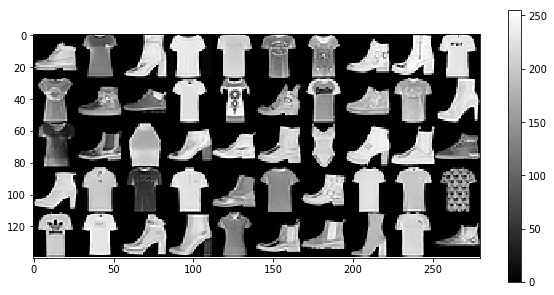

In [4]:
#Sample the data to only contain T-shirt and Ankle boot
labels_to_select = [0,9]
selected_train_data, selected_train_labels = sample_data(x_train,y_train,labels_to_select)
selected_test_data, selected_test_labels = sample_data(x_test,y_test,labels_to_select)

#Show some of the images
plot_images(selected_train_data[0:50])
plt.show()

### Use Random Forest to classify T-shirt and Ankle boot

In [30]:
start_time = time.time()
#Use Grid Search to find the best parameter
search_params = {
    "n_estimators": range(1,11),
    "max_depth": range(1,11)
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=10), search_params, cv=3, return_train_score=True)
rf_grid.fit(selected_train_data, selected_train_labels)

elapsed_time = time.time() - start_time
time.strftime("Time required to finish the task above is %H:%M:%S", time.gmtime(elapsed_time))

'Time required to finish the task above is 00:00:30'

In [32]:
print('The best parameter is ',rf_grid.best_params_)
print('The accuracy of the test data using the best parameter is ', rf_grid.score(selected_test_data,selected_test_labels))

The best parameter is  {'max_depth': 5, 'n_estimators': 10}
The accuracy of the test data using the best parameter is  0.999


<IPython.core.display.Javascript object>


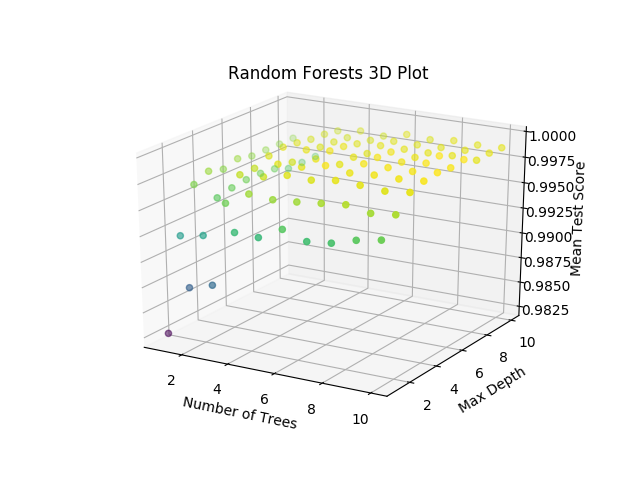

[Text(0.5, 0, 'Mean Test Score'),
 Text(0.5, 0, 'Max Depth'),
 Text(0.5, 0, 'Number of Trees'),
 Text(0.5, 0.92, 'Random Forests 3D Plot')]

In [33]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = rf_grid.cv_results_['mean_test_score']
xdata = [rf_grid.cv_results_['params'][i]['n_estimators'] for i in range(0,len(rf_grid.cv_results_['params']))]
ydata = [rf_grid.cv_results_['params'][i]['max_depth'] for i in range(0,len(rf_grid.cv_results_['params']))]
ax.scatter3D(xdata, ydata, zdata, c=zdata);

ax.set(xlabel='Number of Trees', ylabel='Max Depth', zlabel='Mean Test Score', title='Random Forests 3D Plot')

<IPython.core.display.Javascript object>


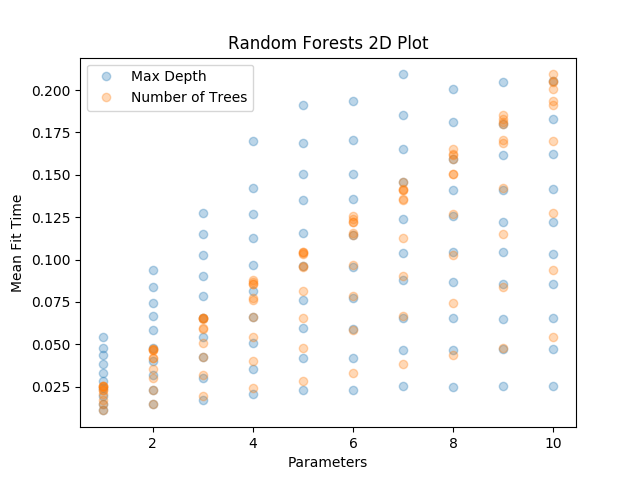

In [35]:
fig, ax = plt.subplots()
x = [rf_grid.cv_results_['params'][i]['max_depth'] for i in range(0,len(rf_grid.cv_results_['params']))]
y = rf_grid.cv_results_['mean_fit_time']
ax.plot(x, y, 'o', label='Max Depth', alpha=0.3)

x = [rf_grid.cv_results_['params'][i]['n_estimators'] for i in range(0,len(rf_grid.cv_results_['params']))]
y = rf_grid.cv_results_['mean_fit_time']
ax.plot(x, y, 'o', label='Number of Trees', alpha=0.3)

ax.set(xlabel='Parameters', ylabel='Mean Fit Time', title='Random Forests 2D Plot')

plt.legend()
plt.show()

### Evaluation

- The time required to find the best parameters by Grid Search method over two parameters with 3 fold cross validation is less than 30 seconds.
- The best number of tress is 10
- The best number of depth is 5
- Using the best parameter, the Random Forest model gives back the test data accuracy as 0.999

Looking at the 3D plot we could see that in the cases of low number of trees and low number of depth, the accuracies on test set are comparatively lower. However, when both parameters number are high, the accuracies do not change that much. An explanation for this is because the test data just consist of two labels so it is relatively easier to classify both of them and this is reflected on a very high accuracy of 0.999.

As for the time taken to fit the model, the number of depth makes the time longer significantly although it seems to become more stagnant on higher number. On the other hand, the number of trees costs the fitting time in linear manner.

### Use Adaboost with Decision Tree to classify T-shirt and Ankle boot

In [36]:
start_time = time.time()
#Use Grid Search to find the best parameter
search_params = {
    "n_estimators": range(1,11),
    "base_estimator": [DecisionTreeClassifier(max_depth=i, random_state=10) for i in range(1,11)]
}
ab_grid = GridSearchCV(AdaBoostClassifier(), search_params, cv=3, return_train_score=True)
ab_grid.fit(selected_train_data, selected_train_labels)

elapsed_time = time.time() - start_time
time.strftime("Time required to finish the task above is %H:%M:%S", time.gmtime(elapsed_time))

'Time required to finish the task above is 00:11:34'

In [37]:
print('The best parameter is ',ab_grid.best_params_)
print('\nThe accuracy of the test data using the best parameter is ', ab_grid.score(selected_test_data,selected_test_labels))

The best parameter is  {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'), 'n_estimators': 10}

The accuracy of the test data using the best parameter is  0.999


<IPython.core.display.Javascript object>


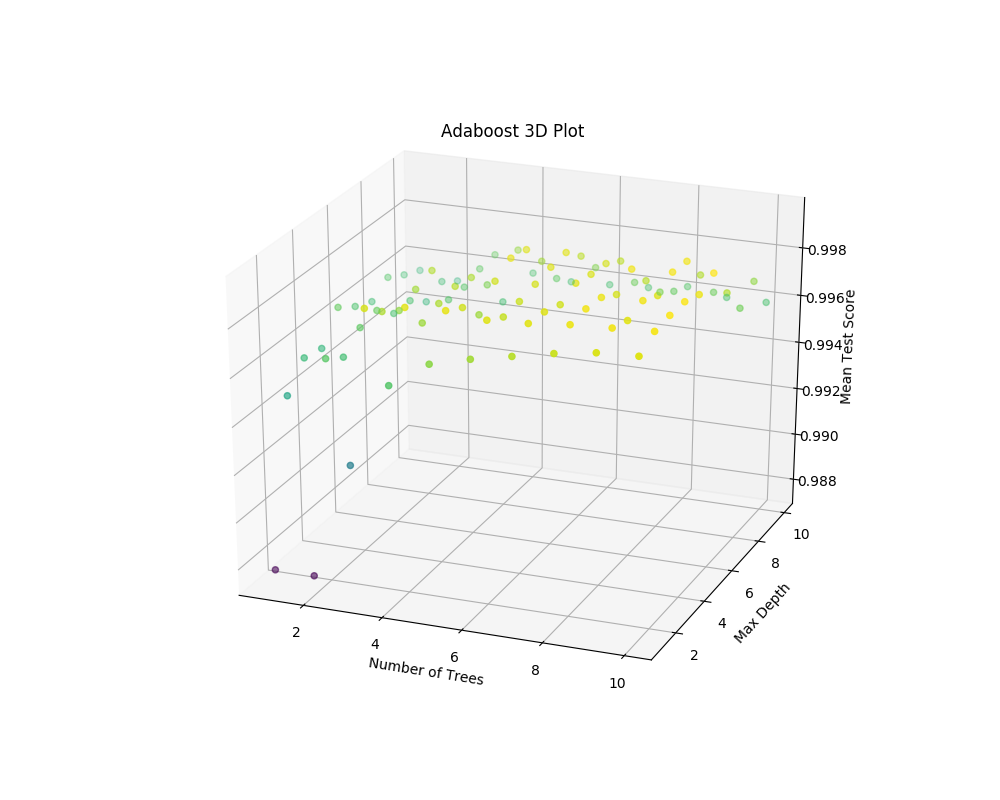

[Text(0.5, 0, 'Mean Test Score'),
 Text(0.5, 0, 'Max Depth'),
 Text(0.5, 0, 'Number of Trees'),
 Text(0.5, 0.92, 'Adaboost 3D Plot')]

In [38]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = ab_grid.cv_results_['mean_test_score']
xdata = [ab_grid.cv_results_['params'][i]['n_estimators'] for i in range(0,len(ab_grid.cv_results_['params']))]
ydata = [ab_grid.cv_results_['params'][i]['base_estimator'].max_depth for i in range(0,len(ab_grid.cv_results_['params']))]
ax.scatter3D(xdata, ydata, zdata, c=zdata);

ax.set(xlabel='Number of Trees', ylabel='Max Depth', zlabel='Mean Test Score', title='Adaboost 3D Plot')

<IPython.core.display.Javascript object>


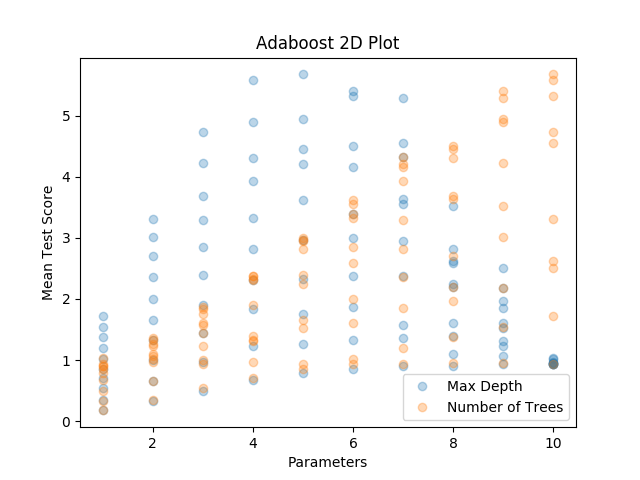

In [39]:
fig, ax = plt.subplots()
x = [ab_grid.cv_results_['params'][i]['base_estimator'].max_depth for i in range(0,len(ab_grid.cv_results_['params']))]
y = ab_grid.cv_results_['mean_fit_time']
ax.plot(x, y, 'o', label='Max Depth', alpha=0.3)

x = [ab_grid.cv_results_['params'][i]['n_estimators'] for i in range(0,len(ab_grid.cv_results_['params']))]
y = ab_grid.cv_results_['mean_fit_time']
ax.plot(x, y, 'o', label='Number of Trees', alpha=0.3)

ax.set(xlabel='Parameters', ylabel='Mean Fit Time', title='Adaboost 2D Plot')

plt.legend()
plt.show()

### Evaluation

- The time required to find the best parameters by Grid Search method over two parameters with 3 fold cross validation is around 11 minutes.
- The best number of tress is 10
- The best number of depth is 6
- Using the best parameter, the Adaboost with DecisionTree as base classifier model gives back the test data accuracy as 0.999

Looking at the 3D plot, Adaboost interestingly favors number of trees while choosing a low number for the depth. This could be achieved because it update the weight of the model from the weak learner adaptively.

Another interesting point in term of fitting time is while the number of trees still contributes lienarly, the same with Random Forest, however the number of depth lengthen the fitting time the most when it has 4 to 6 depth. And it is gradually decreasing when the number of depth increases.

### Train a Random Forest for all classes

In [17]:
start_time = time.time()
#Use Grid Search to find the best parameter
search_params = {
    "n_estimators": range(1,32,5),
    "max_depth": range(1,32,5)
}
rf_grid_all = GridSearchCV(RandomForestClassifier(random_state=10), search_params, cv=3, return_train_score=True)
rf_grid_all.fit(x_train, y_train)

elapsed_time = time.time() - start_time
time.strftime("Time required to finish the task above is %H:%M:%S", time.gmtime(elapsed_time))

'Time required to finish the task above is 00:10:23'

In [19]:
print('The best parameter is ',rf_grid_all.best_params_)
print('\nThe accuracy of the test data using the best parameter is ', rf_grid_all.score(x_test,y_test))

The best parameter is  {'max_depth': 21, 'n_estimators': 31}

The accuracy of the test data using the best parameter is  0.8707


<IPython.core.display.Javascript object>


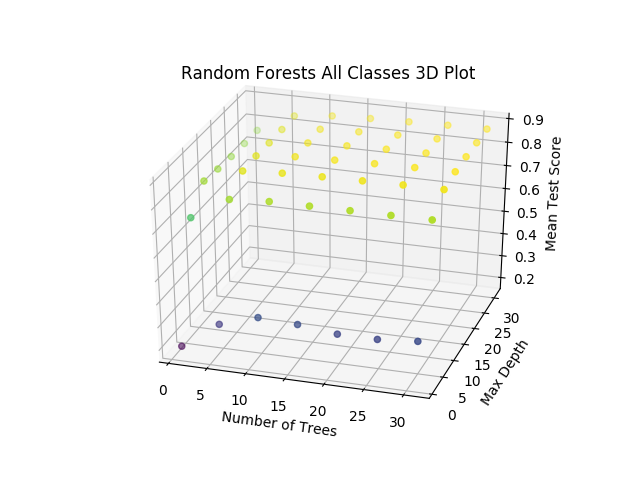

[Text(0.5, 0, 'Mean Test Score'),
 Text(0.5, 0, 'Max Depth'),
 Text(0.5, 0, 'Number of Trees'),
 Text(0.5, 0.92, 'Random Forests All Classes 3D Plot')]

In [20]:
%matplotlib notebook


fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = rf_grid_all.cv_results_['mean_test_score']
xdata = [rf_grid_all.cv_results_['params'][i]['n_estimators'] for i in range(0,len(rf_grid_all.cv_results_['params']))]
ydata = [rf_grid_all.cv_results_['params'][i]['max_depth'] for i in range(0,len(rf_grid_all.cv_results_['params']))]
ax.scatter3D(xdata, ydata, zdata, c=zdata);

ax.set(xlabel='Number of Trees', ylabel='Max Depth', zlabel='Mean Test Score', title='Random Forests All Classes 3D Plot')

<IPython.core.display.Javascript object>


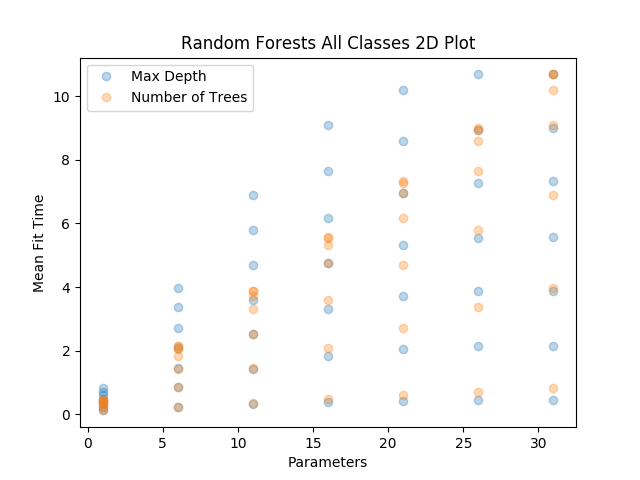

In [29]:
fig, ax = plt.subplots()
x = [rf_grid_all.cv_results_['params'][i]['max_depth'] for i in range(0,len(rf_grid_all.cv_results_['params']))]
y = rf_grid_all.cv_results_['mean_fit_time']
ax.plot(x, y, 'o', label='Max Depth', alpha=0.3)

x = [rf_grid_all.cv_results_['params'][i]['n_estimators'] for i in range(0,len(rf_grid_all.cv_results_['params']))]
y = rf_grid_all.cv_results_['mean_fit_time']
ax.plot(x, y, 'o', label='Number of Trees', alpha=0.3)

ax.set(xlabel='Parameters', ylabel='Mean Fit Time', title='Random Forests All Classes 2D Plot')

plt.legend()
plt.show()

### Evaluation

- The time required to find the best parameters by Grid Search method over two parameters with 3 fold cross validation is more or less 10 minutes.
- The best number of tress is 31
- The best number of depth is 21
- Using the best parameter, the Random Forest model on all label classes gives back the test data accuracy as 0.8707

The performance is good enough considering that it has ten labels to classify for. An interesting point on the 3D plot is that the linear relation between the number of trees and the number of depth, which means the score is usually increased when both of them are increased as well.

For the time complexity of the model, by looking at the 2D plot, we could see that an increase in the number of depth lengthen the fitting time more than the number of trees.

### Train Adaboost for all classes

In [ ]:
start_time = time.time()
#Use Grid Search to find the best parameter
search_params = {
    "n_estimators": range(1,32,10),
    "base_estimator": [DecisionTreeClassifier(max_depth=i) for i in range(1,32,10)]
}
ab_grid_all = GridSearchCV(AdaBoostClassifier(random_state=10), search_params, cv=3, return_train_score=True)
ab_grid_all.fit(x_train, y_train)

elapsed_time = time.time() - start_time
time.strftime("Time required to finish the task above is %H:%M:%S", time.gmtime(elapsed_time))

In [7]:
print('The best parameter is ',ab_grid_all.best_params_)
print('\nThe accuracy of the test data using the best parameter is ', ab_grid_all.score(x_test,y_test))

The best parameter is  {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'n_estimators': 1}

The accuracy of the test data using the best parameter is  0.1992


In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = ab_grid_all.cv_results_['mean_test_score']
xdata = [ab_grid_all.cv_results_['params'][i]['n_estimators'] for i in range(0,len(ab_grid_all.cv_results_['params']))]
ydata = [ab_grid_all.cv_results_['params'][i]['base_estimator'].max_depth for i in range(0,len(ab_grid_all.cv_results_['params']))]
ax.scatter3D(xdata, ydata, zdata, c=zdata);

ax.set(xlabel='Number of Trees', ylabel='Max Depth', zlabel='Mean Score', title='Adaboost All Classes 3D Plot')

In [ ]:
fig, ax = plt.subplots()
x = [ab_grid_all.cv_results_['params'][i]['base_estimator'].max_depth for i in range(0,len(ab_grid_all.cv_results_['params']))]
y = ab_grid_all.cv_results_['mean_test_score']
ax.plot(x, y, label='Max Depth')

x = [ab_grid_all.cv_results_['params'][i]['n_estimators'] for i in range(0,len(ab_grid_all.cv_results_['params']))]
y = ab_grid_all.cv_results_['mean_test_score']
ax.plot(x, y, label='Number of Trees')

ax.set(xlabel='Parameters', ylabel='Mean Test Score', title='Adaboost All Classes 2D Plot')

plt.legend()
plt.show()

### Evaluation

- The time required to find the best parameters by Grid Search method over two parameters with 3 fold cross validation is more or less 10 minutes.
- The best number of tress is 
- The best number of depth is 
- Using the best parameter, the Random Forest model on all label classes gives back the test data accuracy as 0.

### Summary

...

### What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

Random Forest is a parallel type of ensemble learning. It trains multiple models of decision tree at the same time and aggregates them (average or majority vote) to get the final model that reduces the variance of prediction.
On the other hand, Adaboost is a sequential type of ensemble learning. It builds weak learners sequentially and adaptively update the weight of training data with the misclassified data get higher weight. Therefore, the final model will have reduced bias and thus, higher accuracy.